`CMPE-255. Spring 2024`

# A short while ago, in a galaxy nearby...

... three factions, the Cardinal's, the Azure's, and the Verdant's, where quarreling for control of the trade routes. Each faction had a fleet of fighters and supporting vessels.

GLXN News, the number one news reporting agency in the galaxy, decided to investigate the status and capabilities of all factions. The planned to air the report in "The Galaxy News Hour", hosted by Galifante Hoochpuck, the news program with the most audience, just shy of 3 trillion viewers weekly.

Mr. Hoockpuck enlisted the help of the SJSU Data Mining team to analyze all available fleet data and provide him with juicy tidbits of information about all factions.


## Goals of the exercise

1. Hands on experience with Python notebook
2. Get familiar with measurements and statistics on data
3. Hands on data extraction and evaluation
4. Visualization and Analysis of data sets

# Setup

The following code includes all allowed libraries, as well as functions for retrieving the data for this homework.

In [2]:
# Libraries - NO OTHER LIBRARY IS ALLOWED FOR THIS HOMEWORK
import matplotlib.pyplot as plt
from google.colab import files
import pickle
# DO NOT ADD MORE LIBRARIES

In [3]:
# Upload Dataset to colab
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HW1 - fleets.pickle to HW1 - fleets.pickle
User uploaded file "HW1 - fleets.pickle" with length 206142 bytes


In [4]:
# Useful Functions

# Debug Printing
def debug_print(*args):
  '''Print debug messages'''
  #print("** DBG - ", *args)
  return

# Data Loading
def load_data(filename='HW1 - fleets.pickle'):
  '''Load the data for the exercise into a dictionary'''

  with open(filename, 'rb') as handle:
    return pickle.load(handle)

  print("ERROR: Unable to open file '%s'!" % filename)
  return None

# Getting objects from data
def get_objects(fleets, object_faction, object_type, object_property):
  '''Selects and returns objects from a dictionary as a list

     fleets          :  Input dictionary
     object_faction  :  Faction (e.g., "Cardinal")
     object_type     :  Object type (e.g., "Fighter")
     object_property :  Object property (e.g., "Weight")

     return value    :  List of selected values
  '''

  objects_type = fleets[object_faction.lower()]["type"]
  objects = fleets[object_faction.lower()][object_property.lower()]

  # find indexes of objects matching property value, then extract objects based on index
  indexes = [i for i, e in enumerate(objects_type) if e.startswith(object_type)]
  selected_objects = [objects[i] for i in indexes]

  return selected_objects

In [5]:
# EXAMPLE - How to retrieve the homework data
fleets = load_data()
print("The 'fleets' variable contains a dictionary with data about each of the three fleets.")
print("The 'fleets' dictionary also includes a key with a list of all 'types' of spacecrafts: ")
print("   Spacecrafts: " , fleets['types'])
print("")
print("Every 'fleet' is a dictionary with the following keys:")
print("   Fleet keys: ", fleets['azure'].keys())
print("")
print("For instance, here is the data for the 4th spacecraft in the 'Verdant' fleet:")
print("   Fleet     : Verdant")
print("   Type      : %s" % fleets['verdant']['type'][3])
print("   Max Speed : %8.1f Km/h" % fleets['verdant']['speed'][3])
print("   Weight    : %8.1f Kg" % fleets['verdant']['weight'][3])
print("   Location  :", fleets['verdant']['location'][3])
print("")
print("The first object in each fleet is their 'Death Star':")
print("   Fleet.    : Azure")
print("   Type      : %s" % fleets['azure']['type'][0])
print("   Max Speed : %8.1f Km/h" % fleets['azure']['speed'][0])
print("   Weight    : %8.1f Kg" % fleets['azure']['weight'][0])
print("   Location  :", fleets['azure']['location'][0])


The 'fleets' variable contains a dictionary with data about each of the three fleets.
The 'fleets' dictionary also includes a key with a list of all 'types' of spacecrafts: 
   Spacecrafts:  ('Fighter 1', 'Fighter 2', 'Fighter 3', 'Fighter 4', 'Fighter 5', 'Bomber 1', 'Bomber 2', 'Bomber 3', 'Medical', 'Command and Control')

Every 'fleet' is a dictionary with the following keys:
   Fleet keys:  dict_keys(['location', 'type', 'weight', 'speed'])

For instance, here is the data for the 4th spacecraft in the 'Verdant' fleet:
   Fleet     : Verdant
   Type      : Fighter 2
   Max Speed :    204.0 Km/h
   Weight    : 276706.0 Kg
   Location  : (4013.373668089147, 2279.3669307846594, 8042.669323061024)

The first object in each fleet is their 'Death Star':
   Fleet.    : Azure
   Type      : Death Star
   Max Speed :    122.0 Km/h
   Weight    : 843204251723007104.0 Kg
   Location  : (2190.2929690641577, 8173.585493097619, 7639.570753760081)


# 1. Basic Functions

Create a collection of functions to measure properties of the data, or generate statistical values.


### 1.1 Statistical Functions

Create a function for each of the following statistical measures. The inputs/outputs for each function are pre-defined (see template code). Properly comment each function.

1. Mean
2. Median
3. Range
4. Variance
5. Standard Deviation

In [6]:
def get_mean(L):
    '''Compute the mean value of a list of floating point values, or multi-dimensional points.

     L          : List of (int or float) values, or
                  List of points (int or float, multi-dimensional)
                  e.g.: L = [n1, n2, n3, ...]
                  e.g.: L = [(x1, y1, z1, ...), (x2, y2, ...), (x3, y3, ...), ...]

    return value: (int or float) value - mean, if input is list of values
                  Tuple with mean value for each dimension, if input is list of points
                  e.g.: m
                  e.g.: (m1, m2, m3, m4, ...)
  '''
    num_vals = 0
    total_sum = 0
    for val in L:
        total_sum = total_sum + val
        num_vals = num_vals + 1
    result = total_sum / num_vals

    return result


def get_median(L):
    '''Compute the median value of a list of values.

  L             : List of (int or float) values
                  e.g.: L = [ n1, n2, ...]

  return value  : (int or float) value
  '''

    median_num = len(L) / 2
    L.sort()
    if type(median_num) is float:
        median_num = int(median_num - 0.5)
        L.sort()
        result = L[median_num]
    else:
        median_num = median_num - 1
        result = (L[median_num] + L[median_num + 1]) / 2

    return result


def get_range(L):
    '''Compute the range of a list of values.

  L            : List of (int or float) values
                 e.g.: L = [ n1, n2, ...]

  return value : (int or float) value
  '''
    L.sort()
    max_val = L[len(L) - 1]
    min_val = L[0]
    result = max_val - min_val

    return result


def get_variance(L):
    '''Computer the variance of a list of values.

  L            : List of (int or float) values
                 e.g.: L = [ n1, n2, ...]

  return value : (int or float) value
  '''
    samp_mean = get_mean(L)
    sum_mean_diff = 0
    for num_val in L:
        temp_diff = abs(num_val - samp_mean)
        sum_mean_diff = sum_mean_diff + (temp_diff * temp_diff)
    result = sum_mean_diff / (len(L) - 1)
    return result


def get_standard_deviation(L):
    '''Computer the standard deviation of a list of values.

  L            : List of (int or float) values
                 e.g.: L = [ n1, n2, ...]

  return value : (int or float) value
  '''
    variance_val = get_variance(L)
    result = variance_val**0.5
    return result

In [7]:
## TEST
fleets = load_data()
azure_fighters_weight = get_objects(fleets, "azure", "Fighter", "weight")
print("Mean Weight of Azure Fighters      : %.1f Kg" % get_mean(azure_fighters_weight))
print("Median Weight of Azure Fighters    : %.1f Kg" % get_median(azure_fighters_weight))
cardinal_fighters_speed = get_objects(fleets, "cardinal", "Fighter", "speed")
print("Range Speed of Cardinal Fighters   : %.1f Km/h" % get_range(cardinal_fighters_speed))
print("Variance Speed of Cardinal Fighters: %.1f" % get_variance(cardinal_fighters_speed))
print("Std Dev Speed of Cardinal Fighters : %.1f" % get_standard_deviation(cardinal_fighters_speed))


Mean Weight of Azure Fighters      : 432538.7 Kg
Median Weight of Azure Fighters    : 447264.0 Kg
Range Speed of Cardinal Fighters   : 599.0 Km/h
Variance Speed of Cardinal Fighters: 31034.0
Std Dev Speed of Cardinal Fighters : 176.2


### 1.2 Measurements of Distance

Create a function for each of the following distance measures. The inputs/outputs for each function are pre-defined (see template code). Properly comment each function.

1. Euclidean Distance
2. Manhattan Distance
3. Minkowski Distance
4. "Engagement" Distance

In [8]:
def euclidean_distance(P1, P2):
    '''Euclidean distance between two multi-dimensional points.

  P1, P2: n-dimensional tuple of values - (x, y, ...)

  return value: (int or float) value
  '''

    sum_euc = 0
    for dimens in zip(P1, P2):
        sum_euc = sum_euc + (abs(dimens[0] - dimens[1]) ** 2)
    distance = sum_euc ** 0.5
    return distance


def manhattan_distance(P1, P2):
    '''Manhattan distance between two multi-dimensional points.

  P1, P2: n-dimensional tuple of values - (x, y, ...)

  return value: (int or float) value
  '''
    distance = 0
    for dimens in zip(P1, P2):
        distance = distance + abs(dimens[0] - dimens[1])

    return distance


def minkowski_distance(P1, P2):
    '''Minkowski distance between two multi-dimensional points.

    P1, P2: n-dimensional tuple of values - (x, y, ...)

    return value: (int or float) value
  '''
    p = len(P1)
    sum_min = 0
    for dimens in zip(P1, P2):
        sum_min = sum_min + (abs(dimens[0] - dimens[1]) ** p)
    distance = sum_min ** (1/p)
    return distance


def engagement_distance(P1, P2, W1, W2, S1, S2):
    '''Engagement distance between two multi-dimensional points.

    P1, P2: 3-dimensional tuple of values for the location in space - (x, y, z)
    W1, W2: value of the object weight
    S1, S2: value of the object speed

    return value: (int or float) value

    The "Engagement Distance" is defined by the effective distance between two
    objects having into account their weights and speeds. The following
    equation determines the engagement distance:

    D = euclidean_distance(P1, P2) * SQRT(weight_factor(W1) * weight_factor(W2)) * SQRT(speed_factor(S1) * speed_factor(S2))

    where:
      weight_factor(W) = 1.0, if weight < 50,000 Kg
                         1.0 + (W-50,000)/W, if weight >= 50,000 Kg

      speed_factor(S)  = 1.0 - 10/S
  '''

    distance = euclidean_distance(P1, P2) * ((weight_factor(W1) * weight_factor(W2)) ** 0.5) * ((speed_factor(S1) * speed_factor(S2)) ** 0.5)

    return distance


def weight_factor(W):
    if W < 50000:
        return 1.0
    if W >= 50000:
        return (W - 50000) / W


def speed_factor(S):
    return 1.0 - (10 / S)

In [9]:
## TESTING CODE
fleets = load_data()
azure_locations = get_objects(fleets, "azure", "Fighter 2", "location")
# Select location of a couple of fighters
P1 = azure_locations[10]
P2 = azure_locations[43]
# Display various distances between the two fighters
print("Euclidean Distance  : %.1f Km" % euclidean_distance(P1, P2))
print("Manhattan Distance  : %.1f Km" % manhattan_distance(P1, P2))
print("Minkowski Distance  : %.1f" % minkowski_distance(P1, P2))
print("Engagement Distance : %.1f" % engagement_distance(P1, P2, 250000, 75000, 340, 220))



Euclidean Distance  : 612.2 Km
Manhattan Distance  : 1056.1 Km
Minkowski Distance  : 511.9
Engagement Distance : 304.3


### 1.3 Measures of Similarity

Create a function for each of the following similarity measures. The inputs/outputs for each function are pre-defined (see template code). Properly comment each function.

1. Simple Matching Coefficient (SMC)
2. Jaccard Index
3. Cosine Similarity

In [10]:
def get_simple_matching_coefficient(L1, L2):
    '''Compute the SMC between two lists of properties

  L1, L2        : Binary list of attributes
                  "1" - Attribute exists
                  "0" - Attribute doesn't exist
                  e.g.: L = [0, 1, 1, ...]

    return value: (int or float) value

  '''
    num = 0
    numerator = 0
    denominator = len(L1)
    while num < len(L1):
        if L1[num] == L2[num]:
            numerator = numerator + 1
        num = num + 1
    result = numerator / denominator
    return result


def get_jaccard_index(L1, L2):
    '''Compute the Jaccard Index between two lists of properties

  L1, L2        : Binary list of attributes
                  "1" - Attribute exists
                  "0" - Attribute doesn't exist
                  e.g.: L = [0, 1, 1, ...]

    return value: (int or float) value
  '''
    num = 0
    numerator = 0
    denominator = len(L1)
    while num < len(L1):
        if L1[num] == L2[num] and L1[num] != 0:
            numerator = numerator + 1
        if L1[num] == L2[num] and L1[num] == 0:
            denominator = denominator - 1
        num = num + 1
    result = numerator / denominator
    return result


def get_cosine_similarity(L1, L2):
    '''Compute the Cosine Similarity between two lists of property counts

  L1, L2        : List of property counts
                  e.g.: L = [0, 6, 3, ...]

  return value. : (int or float) value
  '''
    inn_prod = 0
    vect_len1 = 0
    vect_len2 = 0
    num = 0
    while num < len(L1):
        inn_prod = inn_prod + (L1[num] * L2[num])
        vect_len1 = vect_len1 + (L1[num] ** 2)
        vect_len2 = vect_len2 + (L2[num] ** 2)
        num = num + 1
    vect_len1 = vect_len1 ** 0.5
    vect_len2 = vect_len2 ** 0.5
    result = inn_prod / (vect_len1 * vect_len2)
    return result

In [11]:
# TEST
L1, L2 = [1,0,0,0,1,0,0,0,0,0], [0,0,0,0,1,0,1,0,0,1]
print("SMC           : %.2f" % get_simple_matching_coefficient(L1, L2))
print("Jaccard Index : %.2f" % get_jaccard_index(L1, L2))

L1, L2 = [3,2,0,5,0,0,0,2,0,0], [1,0,0,0,0,0,0,1,0,2]
print("Cosine Simil. : %.2f" % get_cosine_similarity(L1, L2))

SMC           : 0.70
Jaccard Index : 0.25
Cosine Simil. : 0.31


# 2. Extract Information

## 2.1 Distances in each fleet

We want to identify the fleet that has its fighters "closer" to its Death Star.

Explain what statistical measurements that would be necessary to answer the question above, then perform the calculations and provide an answer.

To find the closest fleet use the euclidean distance function with the locations of the fleet and the location of the Death Star. The smallest mean value is the fleet closest to the Death Star.

In [12]:
def death_star_distance(L):
    # Variables
    death_star_loc = L['location'][0]
    sum_loc = 0
    # loop to sum all distances using euclidean distance
    for val in L['location']:
        if val != death_star_loc:
            sum_loc = sum_loc + euclidean_distance(death_star_loc, val)
    # mean fleet distance
    distance_mean = sum_loc / (len(L['location']) - 1)

    return distance_mean

cardinal_dist_ave = death_star_distance(fleets['cardinal'])
print('cardinal mean distance: ', cardinal_dist_ave)
azure_dist_ave = death_star_distance(fleets['azure'])
print('azure mean distance: ', azure_dist_ave)
verdant_dist_ave = death_star_distance(fleets['verdant'])
print('verdant mean distance: ', verdant_dist_ave)


cardinal mean distance:  1102.30116865231
azure mean distance:  1050.4655547558916
verdant mean distance:  1285.5144413975638


This shows that the azure fleet is closest to its Death Star.

## 2.2 Closest Fighters

For each pair of fleets, find out the closest fighters and display their distance.

Will find the fighter from one fleet and the a fighter from another fleet with the smallest distance from each other. The function will return the locations of the two fighters and the distance.

In [13]:
def fleet_distance(F1, F2):
  # Variables
    num_count = 1
    num_count1 = 1
    list_len = len(F1)
    loc_f1 = -1
    loc_f2 = -1
    dist_val = -1
    # loops to determine distance between each ship to the other fleet's ships
    while num_count < list_len:
      while num_count1 < list_len:
          temp_dist = euclidean_distance(F1['location'][num_count], F2['location'][num_count1])
          if temp_dist < dist_val or dist_val < 0:
            # stores the current shortest distance and locations
            dist_val = temp_dist
            loc_f1 = F1['location'][num_count]
            loc_f2 = F2['location'][num_count1]
          num_count1 = num_count1 + 1
      num_count = num_count + 1
    # the ships that are closest to each other from each fleet
    close_fighters = [loc_f1, loc_f2, dist_val]

    return close_fighters

dist_card_azure = fleet_distance(fleets['cardinal'], fleets['azure'])
print('Cardinal location: ', dist_card_azure[0])
print('Azure location: ', dist_card_azure[1])
print('Distance: ', dist_card_azure[2], '\n')

dist_card_verd = fleet_distance(fleets['cardinal'], fleets['verdant'])
print('Cardinal location: ', dist_card_verd[0])
print('Verdant location: ', dist_card_verd[1])
print('Distance: ', dist_card_verd[2], '\n')

dist_verd_azure = fleet_distance(fleets['verdant'], fleets['azure'])
print('Verdant location: ', dist_verd_azure[0])
print('Azure location: ', dist_verd_azure[1])
print('Distance: ', dist_verd_azure[2])

Cardinal location:  (8528.172018285759, 2660.45355520488, 1228.4977764270398)
Azure location:  (1912.7952441183788, 7102.968645722296, 7244.871832944138)
Distance:  9984.783772400891 

Cardinal location:  (8528.172018285759, 2660.45355520488, 1228.4977764270398)
Verdant location:  (5094.040586112502, 2998.304092843353, 7068.318667552539)
Distance:  6783.134210646932 

Verdant location:  (4013.0492266166275, 2038.6765148215882, 8229.100047397307)
Azure location:  (1912.7952441183788, 7102.968645722296, 7244.871832944138)
Distance:  5570.172955683536


## 2.3 Objects weight

Calculate the average weight of Bombers in each fleet, then calculate the average weight of all objects in each fleet. Explain what type of statistical measurement you use for each calculation, and why.

I used mean, which is the sum of all values divided by the total number of objects summed. I used it because by definition, mean is another word for average.


I removed the weight for the Death Star that was listed in each fleet. This value was vastly different in each set and an outlier. Please let me know if anyone else noticed this.

In [14]:
# Azure fleet bombers
azure_bombers_weight = get_objects(fleets, "azure", "Bomber", "weight")
azure_bomber_mean = get_mean(azure_bombers_weight)
azure_fleet_weight = fleets['azure']['weight'][1:]
azure_weight_mean = get_mean(azure_fleet_weight)
azure_bombers_type = get_objects(fleets, "azure", "Bomber", "type")
print('Azure Fleet Average Bomber Weight: ', azure_bomber_mean)
print('Azure Fleet Average Weight: ', azure_weight_mean, '\n')

# Verdant fleet bombers
verdant_bombers_weight = get_objects(fleets, "verdant", "Bomber", "weight")
verdant_bomber_mean = get_mean(verdant_bombers_weight)
verdant_fleet_weight = fleets['verdant']['weight'][1:]
verdant_bombers_type = get_objects(fleets, "verdant", "Bomber", "type")
verdant_weight_mean = get_mean(verdant_fleet_weight)
print('Verdant Fleet Average Bomber Weight: ', verdant_bomber_mean)
print('Verdant Fleet Average Weight: ', verdant_weight_mean, '\n')

# Cardinal fleet bombers
cardinal_bombers_weight = get_objects(fleets, "cardinal", "Bomber", "weight")
cardinal_bomber_mean = get_mean(cardinal_bombers_weight)
cardinal_fleet_weight = fleets['cardinal']['weight'][1:]
cardinal_bombers_type = get_objects(fleets, "cardinal", "Bomber", "type")
cardinal_weight_mean = get_mean(cardinal_fleet_weight)
print('Cardinal Fleet Average Bomber Weight: ', cardinal_bomber_mean)
print('Cardinal Fleet Average Weight: ', cardinal_weight_mean)







Azure Fleet Average Bomber Weight:  452315.3300330033
Azure Fleet Average Weight:  435876.06806806807 

Verdant Fleet Average Bomber Weight:  317959.1731448763
Verdant Fleet Average Weight:  336284.8288288288 

Cardinal Fleet Average Bomber Weight:  308301.9477124183
Cardinal Fleet Average Weight:  320204.55955955957


## 2.4 Comparing fleets

We want to compare the fleets, and find out which ones are more similar in terms of types of space crafts.

Describe the approach to compare two fleets. Do the calculations and present results.


1)

Because this is based on similarity in terms of types of space crafts, I think it is appropriate to use simple matching coefficient since this method is comparing the mutual existance and non existance of ships.

2)

Alternatively cosine similarity can be used since the data is originally non binary. The map could be the total of each type of space ship in the fleet.

In [16]:
# creating binary map representing space ship existence for each fleet

def bin_ships(L1):
  ships = list(fleets['types'])
  ships.sort()
  temp_list = list()
  for val in ships:
    if val in L1:
      temp_list.append(1)
    else:
      temp_list.append(0)
  return temp_list


# Space Ships - ['Bomber 1', 'Bomber 2', 'Bomber 3', 'Command and Control', 'Fighter 1', 'Fighter 2', 'Fighter 3', 'Fighter 4', 'Fighter 5', 'Medical']

# creating lists of unique values
azure_types = list(set(fleets['azure']['type'][1:]))
azure_bin_ships = bin_ships(azure_types)
print('Azure ship map: ', azure_bin_ships)

verdant_types = list(set(fleets['verdant']['type'][1:]))
verdant_bin_ships = bin_ships(verdant_types)
print('Verdant ship map: ', verdant_bin_ships)

cardinal_types = list(set(fleets['cardinal']['type'][1:]))
cardinal_bin_ships = bin_ships(cardinal_types)
print('Cardinal ship map: ', cardinal_bin_ships)

# Did not work, but I left to show reasoning for moving on to Cosine


Azure ship map:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Verdant ship map:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cardinal ship map:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Without even using SMC would express that all are have the same values and each fleet has the same types of ships ass both others.

For this reason Cosine Similarity may yield more useful results.

**Cosine Similarity:**

In [17]:

# creates map of the frequencies of each ship in the list L1
def cosine_map_ships(L1):
  ships = list(fleets['types'])
  ships.sort()
  temp_list = list()
  # loop checks if ship exists in L1
  for val in ships:
    if val in L1:
      # stores total number of ship found in list L1
      temp_list.append(L1.count(val))
    else:
      # none are found, stores a 0
      temp_list.append(0)
  return temp_list

# sorted list of ships, corresponds to cosine map function
map_keys = ['Bomber 1', 'Bomber 2', 'Bomber 3', 'Command and Control', 'Fighter 1', 'Fighter 2', 'Fighter 3', 'Fighter 4', 'Fighter 5', 'Medical']

azure_types = fleets['azure']['type'][1:]
azure_bin_ships = cosine_map_ships(azure_types)
print('Azure ship map: ', azure_bin_ships)

verdant_types = fleets['verdant']['type'][1:]
verdant_bin_ships = cosine_map_ships(verdant_types)
print('Verdant ship map: ', verdant_bin_ships)

cardinal_types = fleets['cardinal']['type'][1:]
cardinal_bin_ships = cosine_map_ships(cardinal_types)
print('Cardinal ship map: ', cardinal_bin_ships)

Azure ship map:  [105, 93, 105, 97, 84, 95, 105, 106, 107, 102]
Verdant ship map:  [110, 86, 87, 94, 95, 114, 133, 102, 79, 99]
Cardinal ship map:  [110, 93, 103, 116, 87, 103, 94, 93, 106, 94]


In [18]:
# Cosine Similarity:

print('Azure and Cardinal Similarity:')
print(get_cosine_similarity(azure_bin_ships, cardinal_bin_ships), '\n')
print('Azure and Verdant Similarity:')
print(get_cosine_similarity(azure_bin_ships, verdant_bin_ships), '\n')
print('Verdant and Cardinal Similarity:')
print(get_cosine_similarity(verdant_bin_ships, cardinal_bin_ships))

Azure and Cardinal Similarity:
0.9959280964833293 

Azure and Verdant Similarity:
0.987771836226311 

Verdant and Cardinal Similarity:
0.9835914041342095


This shows that the Azure and Cardinal fleets are the most similar.

# 3. Visualize information

## 3.1. Display Fighters in the fleets in a 3D plot

Color each fleet differently. Cardinal in red, Azure in blue, and Verdant in green.


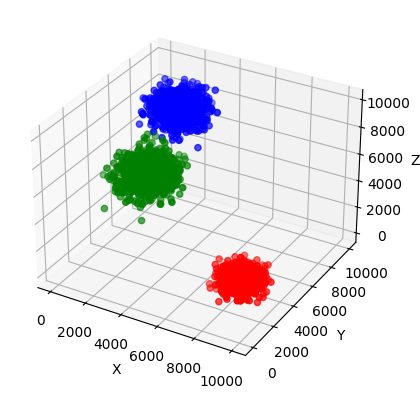

In [19]:
#function to separate coordinates into lists, for easier plotting
def separate_coord(L, axis_val):
  temp_coord = list()
  # chooses element based on which coordinate is requested
  if axis_val == 'x':
    num = 0
  elif axis_val == 'y':
    num = 1
  else:
    num = 2
  # appends all values within a coordinate value into list
  for val in L:
    temp_coord.append(val[num])

  return temp_coord

# Coordinates stored separately in lists.
azure_x = separate_coord(fleets['azure']['location'], 'x')
azure_y = separate_coord(fleets['azure']['location'], 'y')
azure_z = separate_coord(fleets['azure']['location'], 'z')

verdant_x = separate_coord(fleets['verdant']['location'], 'x')
verdant_y = separate_coord(fleets['verdant']['location'], 'y')
verdant_z = separate_coord(fleets['verdant']['location'], 'z')

cardinal_x = separate_coord(fleets['cardinal']['location'], 'x')
cardinal_y = separate_coord(fleets['cardinal']['location'], 'y')
cardinal_z = separate_coord(fleets['cardinal']['location'], 'z')


ax = plt.figure().add_subplot(projection='3d')
# Verdant scatter plot
ax.scatter(verdant_x, verdant_y, zs=verdant_z, zdir='z', label='Verdant', c='green')
# Cardinal scatter plot
ax.scatter(cardinal_x, cardinal_y, zs=cardinal_z, zdir='z', label='Cardinal', c='red')
# Azure scatter plot
ax.scatter(azure_x, azure_y, zs=azure_z, label='Azure', c='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 3.2. Create and display a histogram of occurence of each type of spacecraft in the fleet

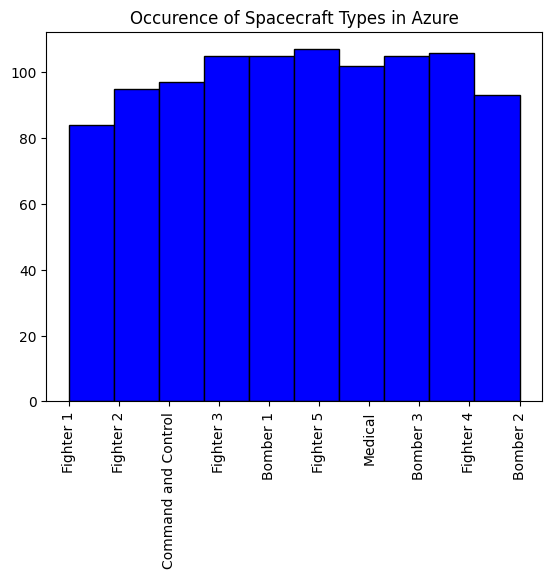

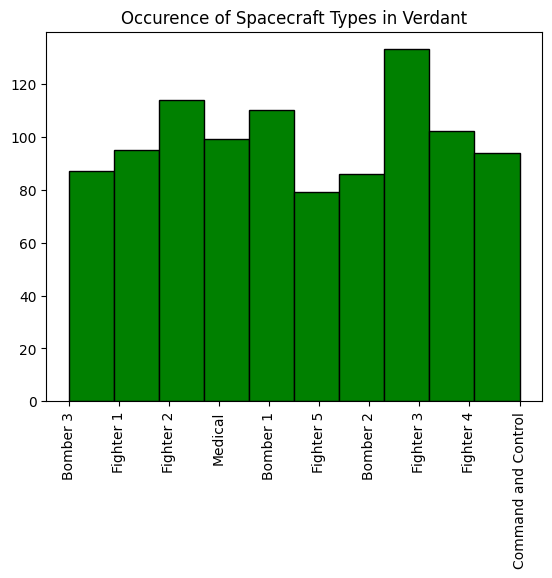

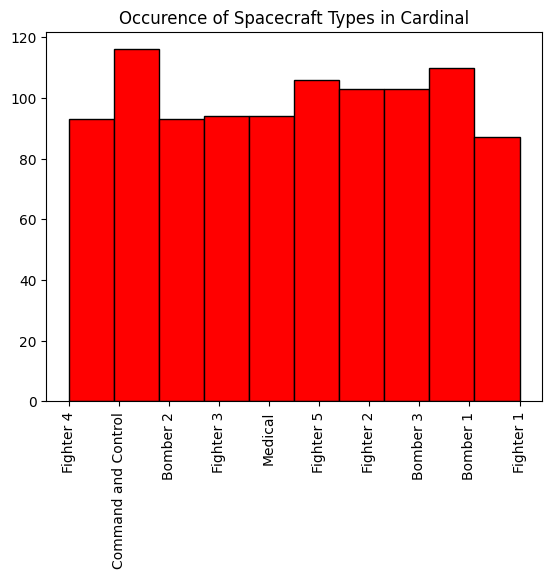

In [31]:
# data for histogram, excluding death star
azure = fleets['azure']['type'][1:]
verdant = fleets['verdant']['type'][1:]
cardinal = fleets['cardinal']['type'][1:]

# Azure Histogram
plt.hist(azure, color='blue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Occurence of Spacecraft Types in Azure')
plt.show()

# Verdant Histogram
plt.hist(verdant, color='green', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Occurence of Spacecraft Types in Verdant')
plt.show()

# Cardinal Histogram
plt.hist(cardinal, color='red', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Occurence of Spacecraft Types in Cardinal')
plt.show()



## 3.3. Create a box plot of the frequency of all the types of spacecrafts across the three factions

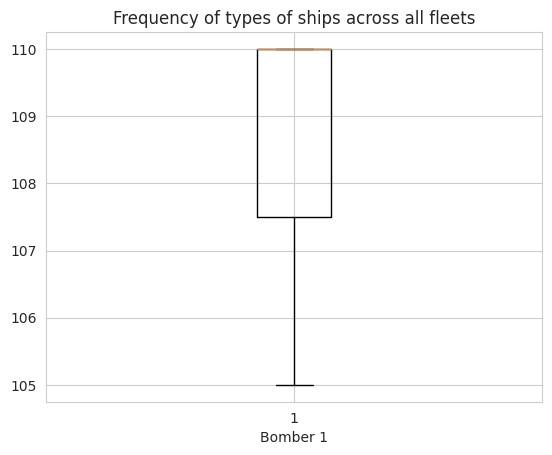

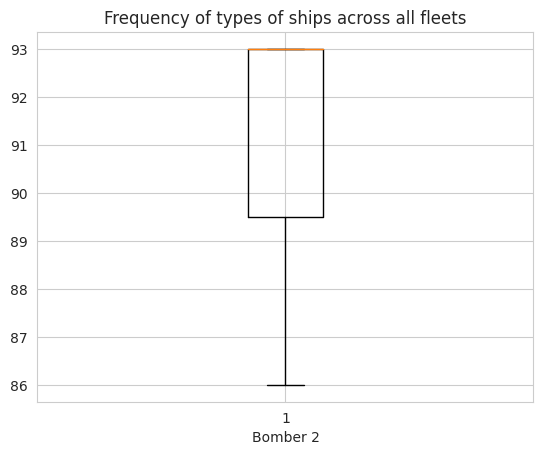

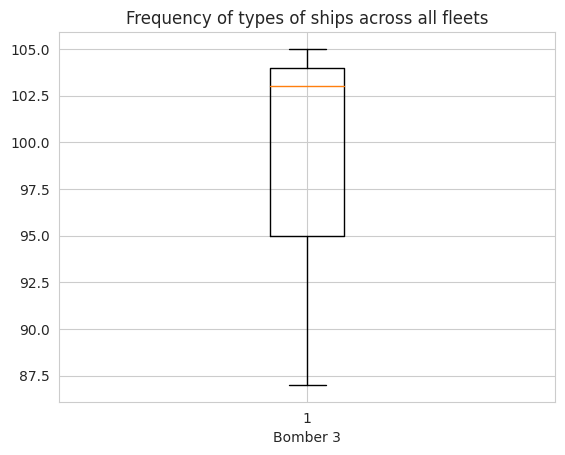

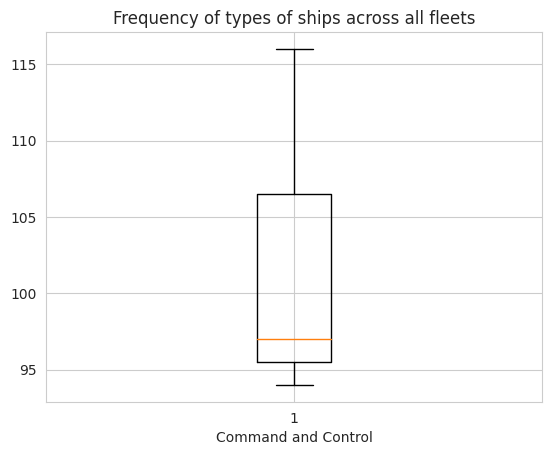

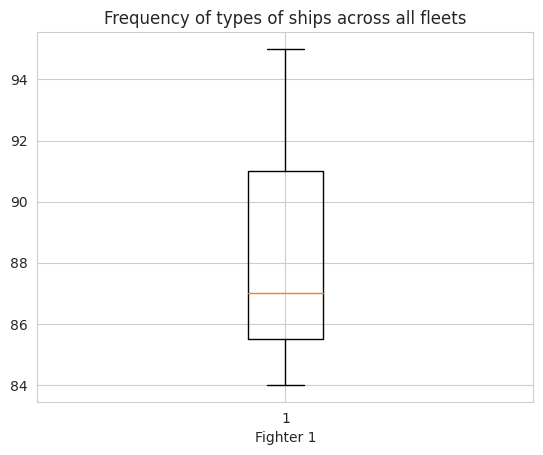

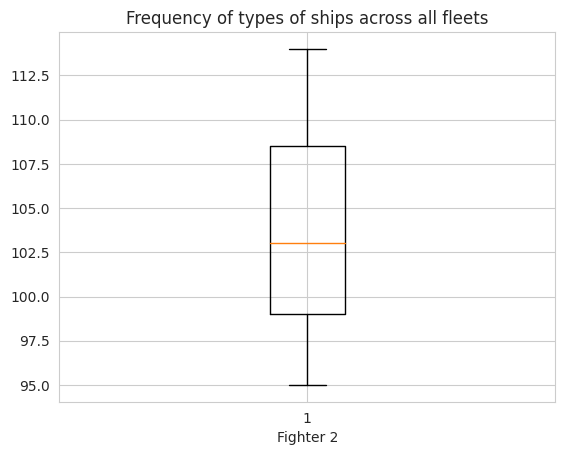

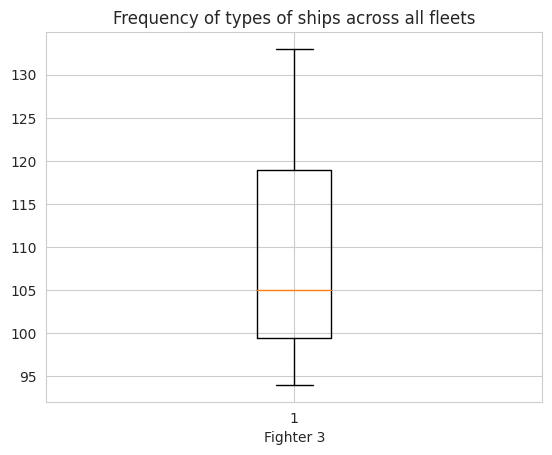

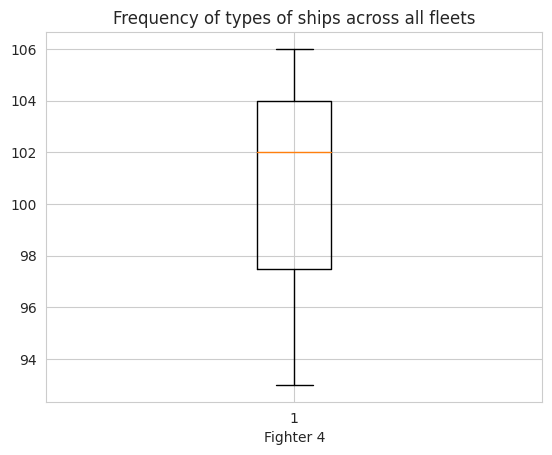

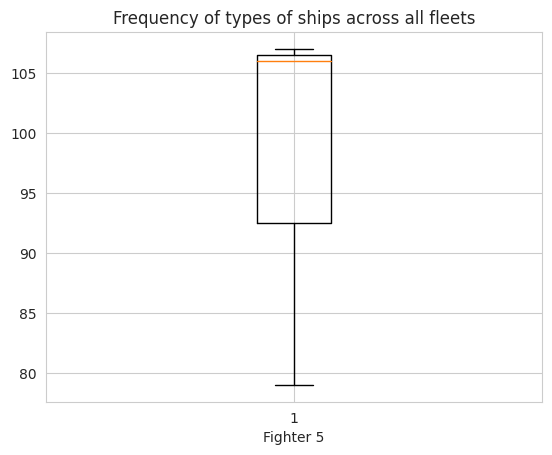

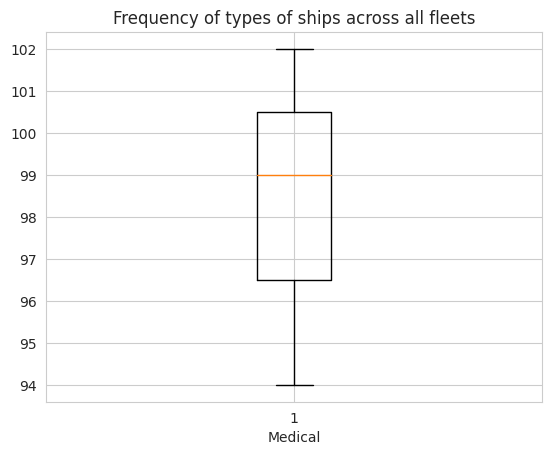

In [94]:


ship_keys = ['Bomber 1','Bomber 2','Bomber 3','Command and Control','Fighter 1','Fighter 2','Fighter 3','Fighter 4','Fighter 5','Medical']

# Variables for ships in each fleet, not including Death Stars
azure_ships = cosine_map_ships(fleets['azure']['type'][1:])
card_ships = cosine_map_ships(fleets['cardinal']['type'][1:])
verd_ships = cosine_map_ships(fleets['verdant']['type'][1:])

# loop to combine frequency data between fleets for boxplots
for data in zip(ship_keys, azure_ships, card_ships, verd_ships):
  # data_plot = [ship type, frequency in Azure, frequency in Cardinal, frequency in Verdant]
  data_plot = [data[1], data[2], data[3]]

  plt.title('Frequency of types of ships across all fleets')
  plt.xlabel(data[0])
  plt.boxplot(data_plot)
  plt.show()

